# Project Machine Learning

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rs = 101

In [5]:
df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', dtype='object', index_col = 'customerID')
df2 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# data = pd.concat([df1, df2])

## EDA and preparing data

In [6]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [7]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

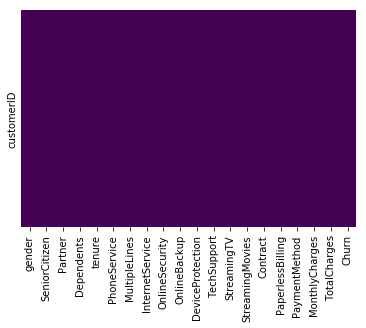

In [8]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## Chage categories data to dummies data

In [10]:
gender_to_num = {'Female': 0,'Male': 1}
partner_to_num = {'No': 0,'Yes': 1}
depend_to_num = {'No': 0,'Yes': 1}
phone_to_num = {'No': 0,'Yes': 1}
multi_to_num = {'No': 0,'Yes': 1,'No phone service':2}
internet_to_num = {'DSL': 0,'Fiber optic': 1,'No': 2}
security_to_num = {'No': 0,'Yes': 1,'No internet service': 2}
backup_to_num = {'No': 0,'Yes': 1,'No internet service': 2}
protection_to_num = {'No': 0,'Yes': 1,'No internet service': 2}
support_to_num = {'No': 0,'Yes': 1,'No internet service': 2}
streamingtv_to_num = {'No': 0,'Yes': 1,'No internet service': 2}
streamingmovie_to_num = {'No': 0,'Yes': 1,'No internet service': 2}
contract_to_num = {'Month-to-month': 0,'One year': 1,'Two year': 2}
paperless_to_num = {'No': 0,'Yes': 1}
payment_to_num = {'Electronic check': 0,'Mailed check': 1,'Bank transfer (automatic)': 2, 'Credit card (automatic)':3}
churn_to_num = {'No': 0,'Yes': 1}
df1['gender_num'] = df1['gender'].map(gender_to_num)
df1['partner_num'] = df1['Partner'].map(partner_to_num)
df1['dependents_num'] = df1['Dependents'].map(depend_to_num)
df1['phone_service_num'] = df1['PhoneService'].map(phone_to_num)
df1['multipleLines_num'] = df1['MultipleLines'].map(multi_to_num)
df1['InternetService_num'] = df1['InternetService'].map(internet_to_num)
df1['Security_num'] = df1['OnlineSecurity'].map(security_to_num)
df1['OnlineBackup_num'] = df1['OnlineBackup'].map(backup_to_num)
df1['DeviceProtection_num'] = df1['DeviceProtection'].map(protection_to_num)
df1['TechSupport_num'] = df1['TechSupport'].map(support_to_num)
df1['StreamingTV_num'] = df1['StreamingTV'].map(streamingtv_to_num)
df1['StreamingMovie_num'] = df1['StreamingMovies'].map(streamingmovie_to_num)
df1['Contract_num'] = df1['Contract'].map(contract_to_num)
df1['PaperlessBill_num'] = df1['PaperlessBilling'].map(paperless_to_num)
df1['PaymentMethod_num'] = df1['PaymentMethod'].map(payment_to_num)
df1['Churn_num'] = df1['Churn'].map(churn_to_num)

# TotalCharges are NULL values.
# totacharges_null = df1[df1['customerID']= ['4472-LVYGI','3115-CZMZD',
#                                            '5709-LVOEQ','4367-NUYAO',
#                                            '1371-DWPAZ','7644-OMVMY',
#                                            '7644-OMVMY','3213-VVOLG',
#                                             '2520-SGTTA',
#                                            '2923-ARZLG','4075-WKNIU',
#                                            '2775-SEFEE']]

df1.drop(['4472-LVYGI','3115-CZMZD','5709-LVOEQ','4367-NUYAO',
        '1371-DWPAZ','7644-OMVMY','3213-VVOLG','2520-SGTTA','2923-ARZLG','4075-WKNIU',
          '2775-SEFEE'], inplace = True)



df1.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
         'Contract','PaperlessBilling','PaymentMethod','Churn'],axis =1, inplace = True)





# df1['MonthlyCharges'] = df1['MonthlyCharges'].astype('float32')
# # df1['TotalCharges'] = df1['TotalCharges'].astype('float32').dropna()
# pd.to_numeric(df1['TotalCharges'], errors='coerce').notnull()
# df1 = df1.dropna()
# df1['tenure'] = df1['tenure'].astype('int64') 

In [11]:
# df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
SeniorCitizen           7032 non-null object
tenure                  7032 non-null object
MonthlyCharges          7032 non-null object
TotalCharges            7032 non-null object
gender_num              7032 non-null int64
partner_num             7032 non-null int64
dependents_num          7032 non-null int64
phone_service_num       7032 non-null int64
multipleLines_num       7032 non-null int64
InternetService_num     7032 non-null int64
Security_num            7032 non-null int64
OnlineBackup_num        7032 non-null int64
DeviceProtection_num    7032 non-null int64
TechSupport_num         7032 non-null int64
StreamingTV_num         7032 non-null int64
StreamingMovie_num      7032 non-null int64
Contract_num            7032 non-null int64
PaperlessBill_num       7032 non-null int64
PaymentMethod_num       7032 non-null int64
Churn_num               7032 non-null int64

In [13]:
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype('int64')
df1['tenure'] = df1['tenure'].astype('float64')
df1['MonthlyCharges'] = df1['MonthlyCharges'].astype('float64')
df1['TotalCharges'] = df1['TotalCharges'].astype('float64')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
SeniorCitizen           7032 non-null int64
tenure                  7032 non-null float64
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null float64
gender_num              7032 non-null int64
partner_num             7032 non-null int64
dependents_num          7032 non-null int64
phone_service_num       7032 non-null int64
multipleLines_num       7032 non-null int64
InternetService_num     7032 non-null int64
Security_num            7032 non-null int64
OnlineBackup_num        7032 non-null int64
DeviceProtection_num    7032 non-null int64
TechSupport_num         7032 non-null int64
StreamingTV_num         7032 non-null int64
StreamingMovie_num      7032 non-null int64
Contract_num            7032 non-null int64
PaperlessBill_num       7032 non-null int64
PaymentMethod_num       7032 non-null int64
Churn_num               7032 non-null int

In [15]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,Churn_num
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1.0,29.85,29.85,0,1,0,0,2,0,0,1,0,0,0,0,0,1,0,0
5575-GNVDE,0,34.0,56.95,1889.50,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
3668-QPYBK,0,2.0,53.85,108.15,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1
7795-CFOCW,0,45.0,42.30,1840.75,1,0,0,0,2,0,1,0,1,1,0,0,1,0,2,0
9237-HQITU,0,2.0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1


In [16]:
df_2 = df1[['MonthlyCharges','TotalCharges','tenure','Churn_num']]
df_2.head()

,MonthlyCharges,TotalCharges,tenure,Churn_num
customerID,,,,
7590-VHVEG,29.85,29.85,1.0,0
5575-GNVDE,56.95,1889.50,34.0,0
3668-QPYBK,53.85,108.15,2.0,1
7795-CFOCW,42.30,1840.75,45.0,0
9237-HQITU,70.70,151.65,2.0,1


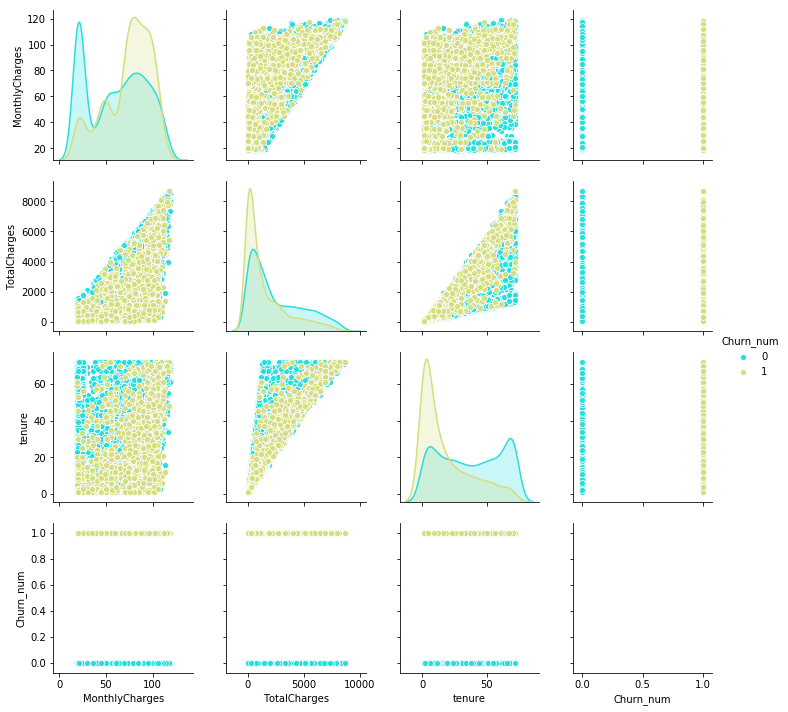

In [17]:
print(sns.pairplot(df_2,hue='Churn_num',palette='rainbow'))

In [18]:
df1.shape

(7032, 20)

### Find outlier

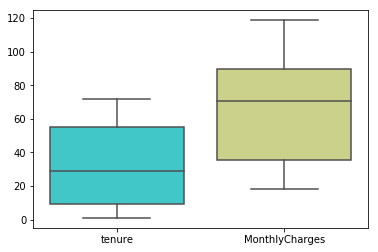

In [23]:
sns.boxplot(data=df1[['tenure','MonthlyCharges']],palette='rainbow')

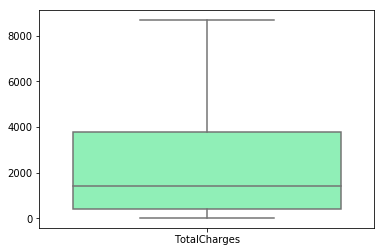

In [21]:
sns.boxplot(data=df1[['TotalCharges']],palette='rainbow')

### bar plot

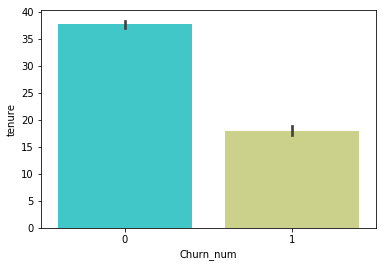

In [26]:
sns.barplot(x="Churn_num", y="tenure", data=df1,palette='rainbow')

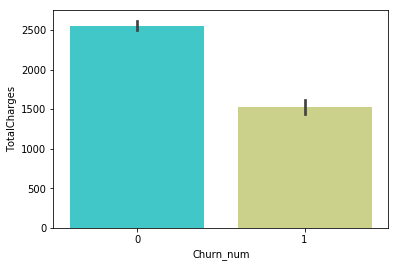

In [25]:
sns.barplot(x="Churn_num", y="TotalCharges", data=df1,palette='rainbow')

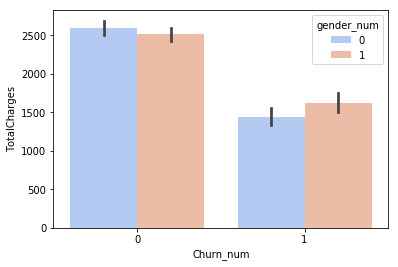

In [24]:
sns.barplot(x="Churn_num", y="TotalCharges", hue="gender_num",data=df1, palette="coolwarm")

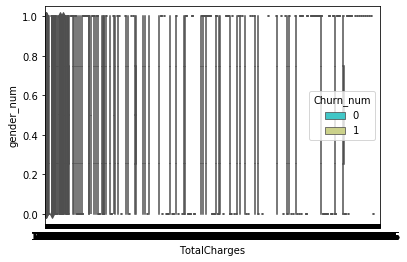

In [92]:
sns.his(x="TotalCharges", y="gender_num", hue="Churn_num",data=df1, palette="rainbow")

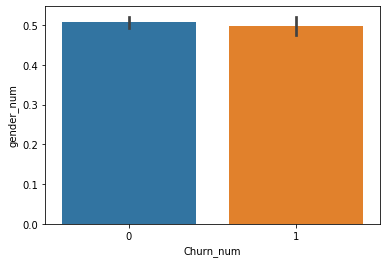

In [93]:
sns.barplot(x='Churn_num',y='gender_num',data=df1)

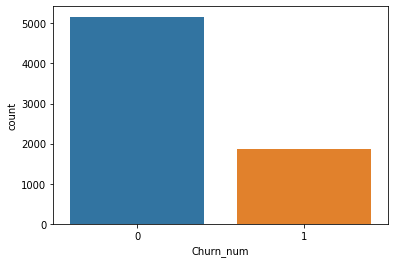

In [94]:
sns.countplot(x='Churn_num',data=df1)

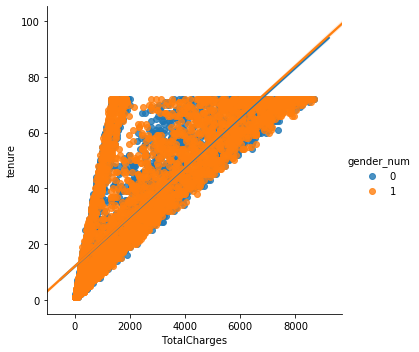

In [96]:
sns.lmplot(x='TotalCharges',y='tenure',data=df1,hue='gender_num')

# Set X and Y variables

In [82]:
X = df1.drop(['Churn_num'], axis=1)
y = df1['Churn_num']

In [83]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1.0,29.85,29.85,0,1,0,0,2,0,0,1,0,0,0,0,0,1,0
5575-GNVDE,0,34.0,56.95,1889.50,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1
3668-QPYBK,0,2.0,53.85,108.15,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1
7795-CFOCW,0,45.0,42.30,1840.75,1,0,0,0,2,0,1,0,1,1,0,0,1,0,2
9237-HQITU,0,2.0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
SeniorCitizen           7032 non-null int64
tenure                  7032 non-null float64
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null float64
gender_num              7032 non-null int64
partner_num             7032 non-null int64
dependents_num          7032 non-null int64
phone_service_num       7032 non-null int64
multipleLines_num       7032 non-null int64
InternetService_num     7032 non-null int64
Security_num            7032 non-null int64
OnlineBackup_num        7032 non-null int64
DeviceProtection_num    7032 non-null int64
TechSupport_num         7032 non-null int64
StreamingTV_num         7032 non-null int64
StreamingMovie_num      7032 non-null int64
Contract_num            7032 non-null int64
PaperlessBill_num       7032 non-null int64
PaymentMethod_num       7032 non-null int64
dtypes: float64(3), int64(16)
memory usag

In [85]:
print(y.value_counts())
print('\nHave an imbalance data')

0    5163
1    1869
Name: Churn_num, dtype: int64

Have an imbalance data


# Preprocessing

## Split train and test data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

In [87]:
X_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_num', 'partner_num', 'dependents_num', 'phone_service_num',
       'multipleLines_num', 'InternetService_num', 'Security_num',
       'OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num',
       'StreamingTV_num', 'StreamingMovie_num', 'Contract_num',
       'PaperlessBill_num', 'PaymentMethod_num'],
      dtype='object')

## Oversampling with SMOTE

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = rs, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [89]:
col = [X_train.columns]
X_train_res1 = pd.DataFrame(X_train_res, columns = col)
y_train_res1 = pd.DataFrame(y_train_res)
y_train_res1.apply(pd.value_counts)

,0
1,3583
0,3583


In [90]:
X_train_res1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num
0,0.0,50.0,109.65,5551.15,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0
1,0.0,12.0,98.90,1120.95,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
2,1.0,52.0,106.50,5621.85,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.0,9.0,19.90,164.60,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0
4,0.0,62.0,101.15,6638.35,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0


In [91]:
y_train_res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7166 entries, 0 to 7165
Data columns (total 1 columns):
0    7166 non-null int64
dtypes: int64(1)
memory usage: 56.1 KB


In [92]:
X_train_res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7166 entries, 0 to 7165
Data columns (total 19 columns):
(SeniorCitizen,)           7166 non-null float64
(tenure,)                  7166 non-null float64
(MonthlyCharges,)          7166 non-null float64
(TotalCharges,)            7166 non-null float64
(gender_num,)              7166 non-null float64
(partner_num,)             7166 non-null float64
(dependents_num,)          7166 non-null float64
(phone_service_num,)       7166 non-null float64
(multipleLines_num,)       7166 non-null float64
(InternetService_num,)     7166 non-null float64
(Security_num,)            7166 non-null float64
(OnlineBackup_num,)        7166 non-null float64
(DeviceProtection_num,)    7166 non-null float64
(TechSupport_num,)         7166 non-null float64
(StreamingTV_num,)         7166 non-null float64
(StreamingMovie_num,)      7166 non-null float64
(Contract_num,)            7166 non-null float64
(PaperlessBill_num,)       7166 non-null float64
(PaymentMet

## Change type of dummies variable to int64

In [93]:
X_train_res1['SeniorCitizen'] = X_train_res1['SeniorCitizen'].astype('int64')
X_train_res1['gender_num'] = X_train_res1['gender_num'].astype('int64')
X_train_res1['partner_num'] = X_train_res1['partner_num'].astype('int64')
X_train_res1['dependents_num'] = X_train_res1['dependents_num'].astype('int64')
X_train_res1['phone_service_num'] = X_train_res1['phone_service_num'].astype('int64')
X_train_res1['multipleLines_num'] = X_train_res1['multipleLines_num'].astype('int64')
X_train_res1['InternetService_num'] = X_train_res1['InternetService_num'].astype('int64')
X_train_res1['Security_num'] = X_train_res1['Security_num'].astype('int64')
X_train_res1['OnlineBackup_num'] = X_train_res1['OnlineBackup_num'].astype('int64')
X_train_res1['DeviceProtection_num'] = X_train_res1['DeviceProtection_num'].astype('int64')
X_train_res1['TechSupport_num'] = X_train_res1['TechSupport_num'].astype('int64')
X_train_res1['StreamingTV_num'] = X_train_res1['StreamingTV_num'].astype('int64')
X_train_res1['Contract_num'] = X_train_res1['Contract_num'].astype('int64')
X_train_res1['PaperlessBill_num'] = X_train_res1['PaperlessBill_num'].astype('int64')
X_train_res1['PaymentMethod_num'] = X_train_res1['PaymentMethod_num'].astype('int64')
X_train_res1['StreamingMovie_num'] = X_train_res1['StreamingMovie_num'].astype('int64')

In [94]:
X_train_res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7166 entries, 0 to 7165
Data columns (total 19 columns):
(SeniorCitizen,)           7166 non-null int64
(tenure,)                  7166 non-null float64
(MonthlyCharges,)          7166 non-null float64
(TotalCharges,)            7166 non-null float64
(gender_num,)              7166 non-null int64
(partner_num,)             7166 non-null int64
(dependents_num,)          7166 non-null int64
(phone_service_num,)       7166 non-null int64
(multipleLines_num,)       7166 non-null int64
(InternetService_num,)     7166 non-null int64
(Security_num,)            7166 non-null int64
(OnlineBackup_num,)        7166 non-null int64
(DeviceProtection_num,)    7166 non-null int64
(TechSupport_num,)         7166 non-null int64
(StreamingTV_num,)         7166 non-null int64
(StreamingMovie_num,)      7166 non-null int64
(Contract_num,)            7166 non-null int64
(PaperlessBill_num,)       7166 non-null int64
(PaymentMethod_num,)       7166 non-null 

# Standard Scaler

In [95]:
X_train1 = X_train_res1.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)
X_test1 = X_test.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)

In [96]:
X_train1 = X_train1.astype('int64')
X_train1.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0
1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,2
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0
3,0,1,0,0,1,0,2,2,2,2,2,2,2,1,1,0
4,0,0,1,1,1,1,1,1,0,0,0,1,1,2,1,2


In [97]:
X_train2 = pd.DataFrame(X_train, columns = ['tenure','MonthlyCharges','TotalCharges'])
X_test2 = pd.DataFrame(X_test, columns = ['tenure','MonthlyCharges','TotalCharges'])

X_train2.head(2)

,tenure,MonthlyCharges,TotalCharges
customerID,,,
5013-SBUIH,50.0,109.65,5551.15
4315-MURBD,12.0,98.90,1120.95


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [99]:
X_train2_sc = sc.fit_transform(X_train2)
X_test2_sc = sc.transform(X_test2)

In [100]:
X_train2_sc = pd.DataFrame(X_train2_sc, columns = ['tenure','MonthlyCharges','TotalCharges'])
X_test2_sc = pd.DataFrame(X_test2_sc, columns = ['tenure','MonthlyCharges','TotalCharges'])
X_train2_sc.head()

,tenure,MonthlyCharges,TotalCharges
0,0.723700,1.483236,1.441721
1,-0.829194,1.126921,-0.508566
2,0.805431,1.378827,1.472845
3,-0.951790,-1.491582,-0.929575
4,1.214088,1.201498,1.920335


In [101]:
X_train1.reset_index(drop = True, inplace = True)
X_test1.reset_index(drop = True, inplace = True)

In [102]:
X_train1.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0
1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,2
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0
3,0,1,0,0,1,0,2,2,2,2,2,2,2,1,1,0
4,0,0,1,1,1,1,1,1,0,0,0,1,1,2,1,2


In [116]:
X_train_sc_full = X_train1.merge(X_train2_sc, left_index = True, right_index = True)
X_test_sc_full = X_test1.merge(X_test2_sc, left_index = True, right_index = True)

In [119]:
X_train_sc_full.apply(pd.to_numeric, errors = 'ignore')

X_train_sc_full.columns = X_test_sc_full.columns
X_train_sc_full.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0,0.723700,1.483236,1.441721
1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,2,-0.829194,1.126921,-0.508566
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0.805431,1.378827,1.472845
3,0,1,0,0,1,0,2,2,2,2,2,2,2,1,1,0,-0.951790,-1.491582,-0.929575
4,0,0,1,1,1,1,1,1,0,0,0,1,1,2,1,2,1.214088,1.201498,1.920335


In [120]:
X_test_sc_full.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges
0,0,1,1,1,1,1,1,0,0,1,0,1,0,0,1,0,-0.420537,0.790493,-0.172145
1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,2,-0.011881,-0.001687,-0.116765
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.706597,-0.616538,-0.720534
3,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,-1.033522,1.037427,-0.720424
4,0,0,0,0,1,0,1,0,0,1,1,1,1,2,0,3,0.682834,1.184925,1.162883


# K-Mean

In [37]:
X_train_sc_full = X_train1.merge(X_train2_sc, left_index = True, right_index = True)
X_test_sc_full = X_test1.merge(X_test2_sc, left_index = True, right_index = True)

X_all_sc_full = X_train_sc_full.merge(y_test, left_index = True, right_index = True)

In [186]:
X_all_sc_full.columns

Index([       ('SeniorCitizen',),           ('gender_num',),
                ('partner_num',),       ('dependents_num',),
          ('phone_service_num',),    ('multipleLines_num',),
        ('InternetService_num',),         ('Security_num',),
           ('OnlineBackup_num',), ('DeviceProtection_num',),
            ('TechSupport_num',),      ('StreamingTV_num',),
         ('StreamingMovie_num',),         ('Contract_num',),
          ('PaperlessBill_num',),    ('PaymentMethod_num',),
                        'tenure',          'MonthlyCharges',
                  'TotalCharges',               'Churn_num'],
      dtype='object')

In [187]:
from sklearn.cluster import KMeans
score = []
n_list = list(range(2,40))

for n in n_list:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_train_sc_full)
    score.append(kmeans.inertia_)

Text(0, 0.5, 'Error')

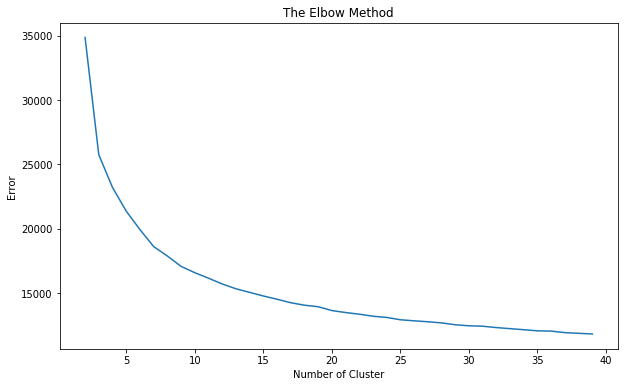

In [188]:
plt.figure(figsize=(10,6))
plt.plot(n_list,score)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Error')

In [189]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_train_sc_full)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [190]:
kmeans.labels_

array([4, 6, 4, ..., 2, 0, 2], dtype=int32)

In [191]:
kmeans.inertia_

18632.220777607537

In [192]:
data_result = X_train_sc_full.copy()
data_result['cluster'] = kmeans.labels_

In [193]:
data_result.head(10)

,"(SeniorCitizen,)","(gender_num,)","(partner_num,)","(dependents_num,)","(phone_service_num,)","(multipleLines_num,)","(InternetService_num,)","(Security_num,)","(OnlineBackup_num,)","(DeviceProtection_num,)","(TechSupport_num,)","(StreamingTV_num,)","(StreamingMovie_num,)","(Contract_num,)","(PaperlessBill_num,)","(PaymentMethod_num,)",tenure,MonthlyCharges,TotalCharges,cluster
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0,0.723700,1.483236,1.441721,4
1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,2,-0.829194,1.126921,-0.508566,6
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0.805431,1.378827,1.472845,4
3,0,1,0,0,1,0,2,2,2,2,2,2,2,1,1,0,-0.951790,-1.491582,-0.929575,1
4,0,0,1,1,1,1,1,1,0,0,0,1,1,2,1,2,1.214088,1.201498,1.920335,0
5,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2,-1.278715,0.152440,-0.971441,6
6,0,1,1,1,1,0,0,0,1,0,1,1,1,2,0,2,1.132356,0.399375,0.998326,0
7,0,1,1,0,1,0,2,2,2,2,2,2,2,2,0,1,1.050625,-1.463408,-0.479951,5
8,0,0,1,0,1,1,0,1,1,1,1,1,1,2,1,3,1.541013,0.991024,2.017492,0
9,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,2,-0.951790,-0.179016,-0.768695,6


# Modeling

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
def print_score(clf, X, y, cv=0):
    
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y, y_pred)
    clf_report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
                 
    print(f"Results:\n")
    print(f"accuracy score: {acc_score:.4f}\n")
    print(f"Classification Report: \n {clf_report}\n")
    print(f"Confusion Matrix: \n {conf_matrix}\n")

    if cv > 1:
        res = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        print(f"Average Accuracy: \t {np.mean(res):.4f}")
        print(f"Accuracy SD: \t\t {np.std(res):.4f}")
        
 

## Random Forest

In [39]:
rf = RandomForestClassifier(random_state = rs)
rf.fit(X_train_res1, y_train_res1)
print_score(rf, X_train_res1,y_train_res1, cv=10)

Results:

accuracy score: 0.9897

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3583
           1       0.99      0.99      0.99      3583

    accuracy                           0.99      7166
   macro avg       0.99      0.99      0.99      7166
weighted avg       0.99      0.99      0.99      7166


Confusion Matrix: 
 [[3560   23]
 [  51 3532]]

Average Accuracy: 	 0.8265
Accuracy SD: 		 0.0736


In [40]:
print_score(rf, X_test,y_test)

Results:

accuracy score: 0.7701

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1580
           1       0.54      0.54      0.54       530

    accuracy                           0.77      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.77      0.77      0.77      2110


Confusion Matrix: 
 [[1341  239]
 [ 246  284]]



## Random forest with oversampling data

In [197]:
rf_res = rf.fit(X_train_res1, y_train_res1)
print_score(rf_res, X_test,y_test, cv=10)

Results:

accuracy score: 0.7701

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1580
           1       0.54      0.54      0.54       530

    accuracy                           0.77      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.77      0.77      0.77      2110


Confusion Matrix: 
 [[1341  239]
 [ 246  284]]

Average Accuracy: 	 0.7744
Accuracy SD: 		 0.0259


## Random forest with scaled data

In [198]:
rf_sc = rf.fit(X_train_sc_full,y_train)
print_score(rf_sc, X_test_sc_full,y_test)

Results:

accuracy score: 0.8005

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1580
           1       0.63      0.48      0.55       530

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110


Confusion Matrix: 
 [[1432  148]
 [ 273  257]]



### Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state= rs, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
log.fit(X_train_res1, y_train_res1)
print_score(log, X_train_res1,y_train_res1, cv=10)

Results:

accuracy score: 0.8094

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      3583
           1       0.79      0.85      0.82      3583

    accuracy                           0.81      7166
   macro avg       0.81      0.81      0.81      7166
weighted avg       0.81      0.81      0.81      7166


Confusion Matrix: 
 [[2764  819]
 [ 547 3036]]

Average Accuracy: 	 0.8037
Accuracy SD: 		 0.0431


In [200]:
print_score(log, X_test,y_test)

Results:

accuracy score: 0.7602

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1580
           1       0.52      0.69      0.59       530

    accuracy                           0.76      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.76      0.77      2110


Confusion Matrix: 
 [[1236  344]
 [ 162  368]]



In [201]:
log_res = log.fit(X_train_res1, y_train_res1)
print_score(log_res,X_test, y_test)

Results:

accuracy score: 0.7602

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1580
           1       0.52      0.69      0.59       530

    accuracy                           0.76      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.76      0.77      2110


Confusion Matrix: 
 [[1236  344]
 [ 162  368]]



# Logistic Regression with scaled data

In [202]:
log_sc = log.fit(X_train_sc_full, y_train)
print_score(log,X_test_sc_full, y_test)

Results:

accuracy score: 0.8043

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.54      0.58       530

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110


Confusion Matrix: 
 [[1411  169]
 [ 244  286]]



### KNeighbors

In [203]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [204]:
knn.fit(X_train_res1, y_train_res1)
print_score(knn,X_train_res1, y_train_res1, cv=10)

Results:

accuracy score: 0.8426

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      3583
           1       0.81      0.89      0.85      3583

    accuracy                           0.84      7166
   macro avg       0.85      0.84      0.84      7166
weighted avg       0.85      0.84      0.84      7166


Confusion Matrix: 
 [[2834  749]
 [ 379 3204]]

Average Accuracy: 	 0.7721
Accuracy SD: 		 0.0194


In [205]:
print_score(knn,X_test, y_test)

Results:

accuracy score: 0.6957

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1580
           1       0.43      0.65      0.52       530

    accuracy                           0.70      2110
   macro avg       0.64      0.68      0.65      2110
weighted avg       0.75      0.70      0.71      2110


Confusion Matrix: 
 [[1122  458]
 [ 184  346]]



In [206]:
knn_res = knn.fit(X_train_res1, y_train_res1)
print_score(knn_res, X_test, y_test)

Results:

accuracy score: 0.6957

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1580
           1       0.43      0.65      0.52       530

    accuracy                           0.70      2110
   macro avg       0.64      0.68      0.65      2110
weighted avg       0.75      0.70      0.71      2110


Confusion Matrix: 
 [[1122  458]
 [ 184  346]]



# KNN with scaled data

In [207]:
knn_sc = knn.fit(X_train_sc_full, y_train)
print_score(knn_sc, X_test_sc_full, y_test)

Results:

accuracy score: 0.7678

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1580
           1       0.54      0.52      0.53       530

    accuracy                           0.77      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.77      0.77      0.77      2110


Confusion Matrix: 
 [[1342  238]
 [ 252  278]]



## SVM

In [208]:
from sklearn import svm
C = 0.1
svm = svm.SVC(kernel='linear', C=C)

In [209]:
svm.fit(X_train_sc_full, y_train)
print_score(svm, X_train_sc_full, y_train, cv=10)

Results:

accuracy score: 0.7950

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      3583
           1       0.65      0.55      0.59      1339

    accuracy                           0.80      4922
   macro avg       0.74      0.72      0.73      4922
weighted avg       0.79      0.80      0.79      4922


Confusion Matrix: 
 [[3182  401]
 [ 608  731]]

Average Accuracy: 	 0.7928
Accuracy SD: 		 0.0158


# Linear SVM with scaled data

In [210]:
svm.fit(X_train_sc_full, y_train)
print_score(svm, X_test_sc_full, y_test)

Results:

accuracy score: 0.7981

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.62      0.51      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110


Confusion Matrix: 
 [[1415  165]
 [ 261  269]]



## Extra Tree

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
xt = ExtraTreesClassifier(random_state=rs)

In [212]:
xt.fit(X_train_res1, y_train_res1)
print_score(xt, X_train_res1, y_train_res1, cv=10)

Results:

accuracy score: 0.9986

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3583
           1       1.00      1.00      1.00      3583

    accuracy                           1.00      7166
   macro avg       1.00      1.00      1.00      7166
weighted avg       1.00      1.00      1.00      7166


Confusion Matrix: 
 [[3582    1]
 [   9 3574]]

Average Accuracy: 	 0.8217
Accuracy SD: 		 0.0770


In [213]:
xt.fit(X_train_res1, y_train_res1)
print_score(xt, X_test, y_test)

Results:

accuracy score: 0.7725

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1580
           1       0.55      0.54      0.54       530

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.77      0.77      0.77      2110


Confusion Matrix: 
 [[1345  235]
 [ 245  285]]



In [214]:
xt_sc = xt.fit(X_train_sc_full, y_train)
print_score(xt_sc, X_test_sc_full,y_test)

Results:

accuracy score: 0.7863

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1580
           1       0.59      0.48      0.53       530

    accuracy                           0.79      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.79      0.78      2110


Confusion Matrix: 
 [[1407  173]
 [ 278  252]]



## GridSearchCV

In [136]:
from sklearn.model_selection import GridSearchCV

### Logistic GridSearch

In [216]:
params = {'penalty': ['l1', 'l2'],
          'solver': ['liblinear']}
cv_log = GridSearchCV(LogisticRegression(random_state=rs), 
                      params, n_jobs=-1, verbose=1)

cv_log.fit(X_train_res1, y_train_res1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=101, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [217]:
cv_log.best_estimator_
cv_log.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [218]:
y_pred = cv_log.predict(X_test)
print_score(cv_log, X_test, y_test)

Results:

accuracy score: 0.7602

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1580
           1       0.52      0.69      0.59       530

    accuracy                           0.76      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.76      0.77      2110


Confusion Matrix: 
 [[1236  344]
 [ 162  368]]



# ใช้ตัวนี้ดีสุด

# Logistic Regression with GridSearch

In [219]:
params = {'penalty': ['l2'],
          'solver': ['newton-cg', 'lbfgs','sag']}
cv_log_2 = GridSearchCV(LogisticRegression(random_state=rs), params, n_jobs=-1, verbose=1)

cv_log_2.fit(X_train_res1, y_train_res1)

cv_log_2.best_estimator_
cv_log_2.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.9s finished


{'penalty': 'l2', 'solver': 'newton-cg'}

In [220]:
d
cv_log_2.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

# Logistic Regression with GridSearchCV

In [221]:
y_pred = cv_log_2.predict(X_test)
print_score(cv_log_2, X_test, y_test)

Results:

accuracy score: 0.7626

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1580
           1       0.52      0.70      0.60       530

    accuracy                           0.76      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.76      0.77      2110


Confusion Matrix: 
 [[1240  340]
 [ 161  369]]



In [73]:
params = {'penalty': ['l1','elasticnet'],
          'solver': ['saga'],
         'l1_ratio': [0.1,0.3,0.5,0.7,1.0]
         }
cv_log_3 = GridSearchCV(LogisticRegression(random_state=rs), params, n_jobs=-1, verbose=1)

cv_log_3.fit(X_train_res1, y_train_res1)

cv_log_3.best_estimator_
cv_log_3.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


{'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [74]:
y_pred = cv_log_3.predict(X_test)
print_score(cv_log_3, X_test, y_test)

Results:

accuracy score: 0.6559

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.61      0.73      1580
           1       0.40      0.79      0.53       530

    accuracy                           0.66      2110
   macro avg       0.65      0.70      0.63      2110
weighted avg       0.77      0.66      0.68      2110


Confusion Matrix: 
 [[967 613]
 [113 417]]



## KNN GridSearch

In [75]:
params = {'n_neighbors': list(range(1,50,2)),
          'algorithm': ['ball_tree', 'kd_tree', 'brute'],
         'metric': ['minkowski','manhattan','euclidean']
         }
cv_knn_1 = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, verbose=1)

cv_knn_1.fit(X_train_sc_full, y_train)

cv_knn_1.best_estimator_
cv_knn_1.best_params_

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:   16.6s finished


{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 35}

# KNN with GridSearchCV

In [76]:
y_pred = cv_knn_1.predict(X_test_sc_full)
print_score(cv_knn_1, X_test_sc_full, y_test)

Results:

accuracy score: 0.7934

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1580
           1       0.60      0.55      0.57       530

    accuracy                           0.79      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110


Confusion Matrix: 
 [[1384  196]
 [ 240  290]]



## ExtraRandomForest GridSearch

In [169]:
params = {'n_estimators': [50,100,150,200],
               "min_samples_split": [2, 3, 5, 10],
               "min_samples_leaf": [1, 3, 5, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']
         }
cv_et_1 = GridSearchCV(ExtraTreesClassifier(), params, n_jobs=-1, verbose=1)

cv_et_1.fit(X_train_res1, y_train_res1)

cv_et_1.best_estimator_
cv_et_1.best_params_

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:   50.0s finished


{'bootstrap': True,
 'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

# ExtraTree with GridSearchCV

In [170]:
y_pred = cv_et_1.predict(X_test)
print_score(cv_et_1, X_test, y_test)

Results:

accuracy score: 0.7673

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1580
           1       0.53      0.59      0.56       530

    accuracy                           0.77      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.78      0.77      0.77      2110


Confusion Matrix: 
 [[1304  276]
 [ 215  315]]



## SVM GridSearch

In [134]:
from sklearn import svm
clf = svm.SVC()

In [137]:
params = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3, 1e-4],'C': [0.1,1, 10, 100, 1000,2000]},
          {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000,2000]},
          {'kernel': ['poly'], 'degree': range(1,20),'C': [0.1,1, 10, 100, 1000,2000]}]
         
cv_svm_1 = GridSearchCV(clf, params, n_jobs=-1, verbose=1)

cv_svm_1.fit(X_train_sc_full, y_train) 

cv_svm_1.best_estimator_
cv_svm_1.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  7.9min finished


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

# SVM GridSearchCV

In [139]:
y_pred = cv_svm_1.predict(X_test_sc_full)
print_score(cv_svm_1, X_test_sc_full, y_test)

Results:

accuracy score: 0.8071

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.66      0.47      0.55       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.81      0.80      2110


Confusion Matrix: 
 [[1452  128]
 [ 279  251]]



# Logistic Regression with GridSearch

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# clf = LogisticRegression(random_state = rs)

In [249]:
# pipe = Pipeline([('classifier' , RandomForestClassifier(random_state=rs))])

param_grid = {'classifier' : [LogisticRegression(random_state = rs)],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}


clf = GridSearchCV(pipe, param_grid = param_grid, verbose=True, n_jobs=-1) 

cv_log= clf.fit(X_train_sc_full, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


In [250]:
cv_log.best_estimator_
cv_log.best_params_

{'classifier': LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 1.623776739188721,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

# Logistic Regression with GridSearch

In [251]:
print_score(cv_log, X_test_sc_full, y_test)

Results:

accuracy score: 0.8043

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.54      0.58       530

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110


Confusion Matrix: 
 [[1410  170]
 [ 243  287]]



## Ensemble

## XGboosting

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier

In [46]:
xgb = xgb.XGBClassifier(max_depth=5, n_estimators=50, learning_rate=0.3,
                            n_jobs=-1, random_state = rs)

In [47]:
xgb.fit(X_train_res1, y_train_res1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# XGBoosting

In [48]:
y_pred = xgb.predict(X_train_res1)
print_score(xgb, X_test, y_test)

Results:

accuracy score: 0.7787

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1580
           1       0.55      0.63      0.59       530

    accuracy                           0.78      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.79      0.78      0.78      2110


Confusion Matrix: 
 [[1309  271]
 [ 196  334]]



# XGBoosting with GridSearch

In [49]:
# estimator = XGBClassifier(
#     objective= 'binary:logistic',
#     nthread=4,
#     seed=rs
# )

In [50]:
# parameters = {
#     'max_depth': range (2, 30, 1),
#     'n_estimators': range(60, 220, 20),
#     'learning_rate': [0.5,0.1, 0.01, 0.05]
# }

In [56]:
# grid_search = GridSearchCV(
#     estimator=estimator,
#     param_grid=parameters,
#     scoring = 'roc_auc',
#     n_jobs = 10,
#     cv = 5,
#     verbose=True
# )

In [52]:
# grid_search.fit(X_train_res1, y_train_res1)

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   25.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  6.7min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  9.9min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed: 14.4min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed: 19.5min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 24.3min
[Parallel(n_jobs=10)]: Done 4480 out of 4480 | elapsed: 28.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=101, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=10,
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.05],
                         'max_depth': range(2, 30),
                         'n_estimators': range(60, 220,

In [54]:
# grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

In [53]:
# print_score(grid_search, X_test, y_test)

Results:

accuracy score: 0.7768

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1580
           1       0.55      0.59      0.57       530

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110


Confusion Matrix: 
 [[1326  254]
 [ 217  313]]



# Voting

In [140]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

In [141]:
svm_clf = SVC(C= 10, gamma= 0.01, kernel= 'rbf', random_state=rs)
knn_clf = KNeighborsClassifier(algorithm= 'ball_tree', metric= 'minkowski', n_neighbors= 35)
et_clf = ExtraTreesClassifier(bootstrap= True,
 criterion= 'gini',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 150, random_state = rs)
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=rs,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)


voting_clf = VotingClassifier(
                estimators=[('svm', svm_clf), ('knn', knn_clf), 
                            ('et', et_clf), ('xgb', xgb_clf)],
                             voting='hard'   
                            )

In [145]:
voting_clf.fit(X_train_sc_full, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=10, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma=0.01, kernel='rbf',
                                  max_iter=-1, probability=False,
                                  random_state=101, shrinking=True, tol=0.001,
                                  verbose=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=Non...
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                          

# Voting

In [146]:
print_score(voting_clf, X_test_sc_full, y_test)

Results:

accuracy score: 0.8062

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.66      0.47      0.55       530

    accuracy                           0.81      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.81      0.79      2110


Confusion Matrix: 
 [[1454  126]
 [ 283  247]]



## Stacking Model

In [253]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.3,random_state=rs)
train_all = X_train_all
train_all['churn_num'] = y_train_all

In [254]:
X_train = train_all.drop(['churn_num'],axis=1)
y_train = train_all['churn_num']

In [255]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5,random_state=rs)

In [283]:
clf1 = LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)
# clf2 = RandomForestClassifier(random_state=rs)
# clf3 = SVC(random_state=rs)
# clf4 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(C= 10, gamma= 0.01, kernel= 'rbf',random_state=rs)
clf4 = KNeighborsClassifier(algorithm= 'ball_tree', metric= 'minkowski', n_neighbors= 35)
clf2 = ExtraTreesClassifier(bootstrap= True,
 criterion= 'gini',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 150, random_state =rs)
clf5 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

clf1.fit(X_train_1, y_train_1)
clf2.fit(X_train_1, y_train_1)
clf3.fit(X_train_1, y_train_1)
clf4.fit(X_train_1, y_train_1)
clf5.fit(X_train_1, y_train_1)

y_pred_clf1 = clf1.predict(X_train_2)
y_pred_clf2 = clf2.predict(X_train_2)
y_pred_clf3 = clf3.predict(X_train_2)
y_pred_clf4 = clf4.predict(X_train_2)ช
y_pred_clf5 = clf4.predict(X_train_2)

In [284]:
x_for_level_2 = pd.DataFrame(data={'clf1': y_pred_clf1, 'clf2': y_pred_clf2,'clf3': y_pred_clf3,'clf4': y_pred_clf4,'clf5': y_pred_clf5})
print(x_for_level_2.head(10))
x_for_level_2 = pd.get_dummies(x_for_level_2,drop_first = True)
print(x_for_level_2.head(10))

   clf1  clf2  clf3  clf4  clf5
0     0     0     0     0     0
1     0     0     0     0     0
2     0     0     0     0     0
3     0     0     0     0     0
4     0     0     0     0     0
5     0     0     0     0     0
6     0     0     0     0     0
7     0     0     0     0     0
8     1     1     1     1     1
9     1     0     1     0     0
   clf1  clf2  clf3  clf4  clf5
0     0     0     0     0     0
1     0     0     0     0     0
2     0     0     0     0     0
3     0     0     0     0     0
4     0     0     0     0     0
5     0     0     0     0     0
6     0     0     0     0     0
7     0     0     0     0     0
8     1     1     1     1     1
9     1     0     1     0     0


In [285]:
clf_blen = RandomForestClassifier(random_state=rs)
clf_blen.fit(x_for_level_2, y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [286]:
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)
y_pred_clf3 = clf3.predict(X_test)
y_pred_clf4 = clf4.predict(X_test)
y_pred_clf5 = clf5.predict(X_test)


x_for_level_2_test = pd.DataFrame(data={'clf1': y_pred_clf1, 'clf2': y_pred_clf2,'clf3': 
                                        y_pred_clf3,'clf4': y_pred_clf4, 'clf5': y_pred_clf5})
x_for_level_2_test = pd.get_dummies(x_for_level_2_test,drop_first = True)

#print(x_for_level_2_test.head())
y_pred = clf_blen.predict(x_for_level_2_test)

print_score(clf_blen, x_for_level_2_test, y_test)

Results:

accuracy score: 0.8038

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1580
           1       0.62      0.58      0.60       530

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.80      0.80      0.80      2110


Confusion Matrix: 
 [[1391  189]
 [ 225  305]]



# PCA with Stacking

In [287]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [288]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.3,random_state=rs)
train_all = X_train_all
train_all['churn_num'] = y_train_all

X_train = train_all.drop(['churn_num'],axis=1)
y_train = train_all['churn_num']


pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [289]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5,random_state=rs)

In [290]:
clf1 = LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)
# clf2 = RandomForestClassifier(random_state=rs)
# clf3 = SVC(random_state=rs)
# clf4 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(C= 10, gamma= 0.01, kernel= 'rbf',random_state=rs)
clf4 = KNeighborsClassifier(algorithm= 'ball_tree', metric= 'minkowski', n_neighbors= 35)
clf2 = ExtraTreesClassifier(bootstrap= True,
 criterion= 'gini',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 150, random_state =rs)
clf5 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
              silent=None, subsample=1, verbosity=1)

clf1.fit(X_train_1, y_train_1)
clf2.fit(X_train_1, y_train_1)
clf3.fit(X_train_1, y_train_1)
clf4.fit(X_train_1, y_train_1)
clf5.fit(X_train_1, y_train_1)

y_pred_clf1 = clf1.predict(X_train_2)
y_pred_clf2 = clf2.predict(X_train_2)
y_pred_clf3 = clf3.predict(X_train_2)
y_pred_clf4 = clf4.predict(X_train_2)
y_pred_clf5 = clf4.predict(X_train_2)

In [291]:
x_for_level_2 = pd.DataFrame(data={'clf1': y_pred_clf1, 'clf2': y_pred_clf2,'clf3': y_pred_clf3,'clf4': y_pred_clf4,'clf5': y_pred_clf5})
print(x_for_level_2.head(10))
x_for_level_2 = pd.get_dummies(x_for_level_2,drop_first = True)
print(x_for_level_2.head(10))

   clf1  clf2  clf3  clf4  clf5
0     0     0     0     0     0
1     0     0     0     0     0
2     0     0     0     0     0
3     0     0     0     0     0
4     0     0     0     0     0
5     0     0     0     0     0
6     0     0     0     0     0
7     0     0     0     0     0
8     1     1     1     1     1
9     1     0     1     0     0
   clf1  clf2  clf3  clf4  clf5
0     0     0     0     0     0
1     0     0     0     0     0
2     0     0     0     0     0
3     0     0     0     0     0
4     0     0     0     0     0
5     0     0     0     0     0
6     0     0     0     0     0
7     0     0     0     0     0
8     1     1     1     1     1
9     1     0     1     0     0


In [267]:
clf_blen = RandomForestClassifier(random_state=rs)
clf_blen.fit(x_for_level_2, y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [292]:
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)
y_pred_clf3 = clf3.predict(X_test)
y_pred_clf4 = clf4.predict(X_test)
y_pred_clf5 = clf5.predict(X_test)


x_for_level_2_test = pd.DataFrame(data={'clf1': y_pred_clf1, 'clf2': y_pred_clf2,'clf3': y_pred_clf3,'clf4': y_pred_clf4, 'clf5': y_pred_clf5})
x_for_level_2_test = pd.get_dummies(x_for_level_2_test,drop_first = True)

#print(x_for_level_2_test.head())
y_pred = clf_blen.predict(x_for_level_2_test)

print_score(clf_blen, x_for_level_2_test, y_test)

Results:

accuracy score: 0.8038

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1580
           1       0.62      0.58      0.60       530

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.80      0.80      0.80      2110


Confusion Matrix: 
 [[1391  189]
 [ 225  305]]



# K-Mean

In [104]:
X_train_sc_full = X_train1.merge(X_train2_sc, left_index = True, right_index = True)
X_train_sc_full.reset_index(drop = True, inplace = True)
X_test_sc_full = X_test1.merge(X_test2_sc, left_index = True, right_index = True)
X_test_sc_full.reset_index(drop = True, inplace = True)
X_train_sc_full.columns = X_test_sc_full.columns.str.replace('$','')

X_all_sc_full = X_train_sc_full.append(X_test_sc_full, ignore_index = True)

In [105]:
X_train_sc_full.columns

Index(['SeniorCitizen', 'gender_num', 'partner_num', 'dependents_num',
       'phone_service_num', 'multipleLines_num', 'InternetService_num',
       'Security_num', 'OnlineBackup_num', 'DeviceProtection_num',
       'TechSupport_num', 'StreamingTV_num', 'StreamingMovie_num',
       'Contract_num', 'PaperlessBill_num', 'PaymentMethod_num', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [106]:
X_all_sc_full.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0,0.723700,1.483236,1.441721
1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,2,-0.829194,1.126921,-0.508566
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0.805431,1.378827,1.472845
3,0,1,0,0,1,0,2,2,2,2,2,2,2,1,1,0,-0.951790,-1.491582,-0.929575
4,0,0,1,1,1,1,1,1,0,0,0,1,1,2,1,2,1.214088,1.201498,1.920335


In [107]:
X_all_sc_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
SeniorCitizen           7032 non-null object
gender_num              7032 non-null int64
partner_num             7032 non-null int64
dependents_num          7032 non-null int64
phone_service_num       7032 non-null int64
multipleLines_num       7032 non-null int64
InternetService_num     7032 non-null int64
Security_num            7032 non-null int64
OnlineBackup_num        7032 non-null int64
DeviceProtection_num    7032 non-null int64
TechSupport_num         7032 non-null int64
StreamingTV_num         7032 non-null int64
StreamingMovie_num      7032 non-null int64
Contract_num            7032 non-null int64
PaperlessBill_num       7032 non-null int64
PaymentMethod_num       7032 non-null int64
tenure                  7032 non-null float64
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null float64
dtypes: float64(3), int64(15), object(1)
memory us

In [108]:
y_all = y_train.append(y_test, ignore_index = True)
print(y_all.head())

0    1
1    1
2    0
3    0
4    0
dtype: int64


In [109]:
y_all.value_counts()

0    5163
1    1869
dtype: int64

In [110]:
print(len(y_all))

7032


In [111]:
col = ['Churn_num']
y_pd = pd.DataFrame(y_all, columns = col)
y_pd.reset_index(drop = True, inplace = True)

In [112]:
y_pd.head()

,Churn_num
0,1
1,1
2,0
3,0
4,0


In [113]:
data_all = X_all_sc_full.merge(y_pd, left_index = True, right_index = True)

In [114]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
SeniorCitizen           7032 non-null object
gender_num              7032 non-null int64
partner_num             7032 non-null int64
dependents_num          7032 non-null int64
phone_service_num       7032 non-null int64
multipleLines_num       7032 non-null int64
InternetService_num     7032 non-null int64
Security_num            7032 non-null int64
OnlineBackup_num        7032 non-null int64
DeviceProtection_num    7032 non-null int64
TechSupport_num         7032 non-null int64
StreamingTV_num         7032 non-null int64
StreamingMovie_num      7032 non-null int64
Contract_num            7032 non-null int64
PaperlessBill_num       7032 non-null int64
PaymentMethod_num       7032 non-null int64
tenure                  7032 non-null float64
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null float64
Churn_num               7032 non-null int64
dtypes

In [115]:
data_all.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges,Churn_num
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0,0.723700,1.483236,1.441721,1
1,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,2,-0.829194,1.126921,-0.508566,1
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0.805431,1.378827,1.472845,0
3,0,1,0,0,1,0,2,2,2,2,2,2,2,1,1,0,-0.951790,-1.491582,-0.929575,0
4,0,0,1,1,1,1,1,1,0,0,0,1,1,2,1,2,1.214088,1.201498,1.920335,0


In [116]:
from sklearn.cluster import KMeans
score = []
n_list = list(range(2,40))

for n in n_list:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_all_sc_full)
    score.append(kmeans.inertia_)

Text(0, 0.5, 'Error')

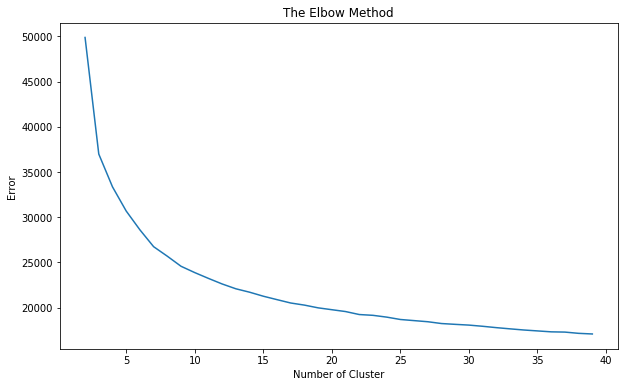

In [117]:
plt.figure(figsize=(10,6))
plt.plot(n_list,score)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Error')

In [118]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_all_sc_full)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [119]:
kmeans.cluster_centers_

array([[ 2.77051130e-01,  5.23186683e-01,  6.46848989e-01,
         2.75862069e-01,  9.79785969e-01,  7.75267539e-01,
         8.02615933e-01,  3.86444709e-01,  6.06420927e-01,
         6.29013080e-01,  4.13793103e-01,  7.56242568e-01,
         7.47919144e-01,  7.33650416e-01,  7.58620690e-01,
         1.30796671e-01,  7.64711519e-01,  9.46712522e-01,
         1.09602075e+00],
       [ 1.73359452e-01,  4.93633692e-01,  4.24094025e-01,
         2.59549461e-01,  1.00000000e+00,  4.35847209e-01,
         5.52399608e-01,  3.13418217e-01,  3.56513222e-01,
         3.50636631e-01,  3.13418217e-01,  3.55533790e-01,
         3.58472086e-01,  2.58570029e-01,  6.59157689e-01,
         2.42213516e+00, -3.49732918e-01,  3.26954173e-01,
        -2.17348378e-01],
       [ 2.64817150e-02,  5.15762926e-01,  3.20302648e-01,
         3.20302648e-01,  1.00000000e+00,  8.95334174e-02,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
    

In [120]:
kmeans.labels_

array([0, 1, 0, ..., 2, 4, 3], dtype=int32)

In [121]:
kmeans.inertia_

26732.76833165368

In [122]:
data_result = data_all.copy()
data_result['cluster'] = kmeans.labels_

In [123]:
data_result.columns

Index(['SeniorCitizen', 'gender_num', 'partner_num', 'dependents_num',
       'phone_service_num', 'multipleLines_num', 'InternetService_num',
       'Security_num', 'OnlineBackup_num', 'DeviceProtection_num',
       'TechSupport_num', 'StreamingTV_num', 'StreamingMovie_num',
       'Contract_num', 'PaperlessBill_num', 'PaymentMethod_num', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'Churn_num', 'cluster'],
      dtype='object')

In [124]:
data_result.head(40)

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,...,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges,Churn_num,cluster
0,0,0,0,0,1,1,1,1,1,0,...,1,1,2,1,0,0.723700,1.483236,1.441721,1,0
1,0,0,0,0,1,0,1,1,0,0,...,1,1,0,1,2,-0.829194,1.126921,-0.508566,1,1
2,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,0,0.805431,1.378827,1.472845,0,0
3,0,1,0,0,1,0,2,2,2,2,...,2,2,1,1,0,-0.951790,-1.491582,-0.929575,0,2
4,0,0,1,1,1,1,1,1,0,0,...,1,1,2,1,2,1.214088,1.201498,1.920335,0,5
5,1,1,0,0,1,0,1,0,0,0,...,0,0,0,1,2,-1.278715,0.152440,-0.971441,1,1
6,0,1,1,1,1,0,0,0,1,0,...,1,1,2,0,2,1.132356,0.399375,0.998326,0,5
7,0,1,1,0,1,0,2,2,2,2,...,2,2,2,0,1,1.050625,-1.463408,-0.479951,0,4
8,0,0,1,0,1,1,0,1,1,1,...,1,1,2,1,3,1.541013,0.991024,2.017492,0,5
9,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,2,-0.951790,-0.179016,-0.768695,0,1


In [125]:
data_result['Churn_num'].value_counts()

0    5163
1    1869
Name: Churn_num, dtype: int64

In [126]:
df_0 = data_result.loc[data_result['cluster'] == 0]
df_1 = data_result.loc[data_result['cluster'] == 1]
df_2 = data_result.loc[data_result['cluster'] == 2]
df_3 = data_result.loc[data_result['cluster'] == 3]
df_4 = data_result.loc[data_result['cluster'] == 4]
df_5 = data_result.loc[data_result['cluster'] == 5]
df_6 = data_result.loc[data_result['cluster'] == 6]

In [127]:
df_0.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,...,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges,Churn_num,cluster
0,0,0,0,0,1,1,1,1,1,0,...,1,1,2,1,0,0.723700,1.483236,1.441721,1,0
2,1,0,1,0,1,1,1,0,1,1,...,1,1,1,1,0,0.805431,1.378827,1.472845,0,0
11,0,1,0,0,1,1,1,0,0,0,...,1,1,0,1,0,0.928028,1.057315,1.324093,1,0
20,1,0,0,0,1,1,1,0,1,0,...,1,1,0,1,0,-0.052747,1.161723,0.400808,1,0
29,0,1,1,1,1,1,1,1,1,1,...,1,1,2,1,0,1.459281,1.599245,2.456375,1,0


# Group 0

In [128]:
X_0 = df_0.drop(['Churn_num', 'cluster'], axis =1)
y_0 = df_0['Churn_num']

In [129]:
X_0.head()

,SeniorCitizen,gender_num,partner_num,dependents_num,phone_service_num,multipleLines_num,InternetService_num,Security_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovie_num,Contract_num,PaperlessBill_num,PaymentMethod_num,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,1,1,1,0,1,1,1,2,1,0,0.723700,1.483236,1.441721
2,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0.805431,1.378827,1.472845
11,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0.928028,1.057315,1.324093
20,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,-0.052747,1.161723,0.400808
29,0,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,1.459281,1.599245,2.456375


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.3, random_state=rs)

In [131]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = rs, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

col = [X_train.columns]
X_train_res1 = pd.DataFrame(X_train_res, columns = col)
y_train_res1 = pd.DataFrame(y_train_res)
y_train_res1.apply(pd.value_counts)

,0
1,426
0,426


In [132]:
rf = RandomForestClassifier(random_state = rs)
rf.fit(X_train_res1, y_train_res1)
print_score(rf, X_train_res1,y_train_res1, cv=10)

Results:

accuracy score: 0.9871

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       426
           1       1.00      0.98      0.99       426

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852


Confusion Matrix: 
 [[424   2]
 [  9 417]]

Average Accuracy: 	 0.8176
Accuracy SD: 		 0.0906


In [133]:
print_score(rf, X_test,y_test)

Results:

accuracy score: 0.7194

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       188
           1       0.44      0.34      0.38        65

    accuracy                           0.72       253
   macro avg       0.61      0.59      0.60       253
weighted avg       0.70      0.72      0.71       253


Confusion Matrix: 
 [[160  28]
 [ 43  22]]



In [134]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = rs)
log.fit(X_train_res1, y_train_res1)
print_score(log, X_train_res1,y_train_res1, cv=10)

Results:

accuracy score: 0.7195

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       426
           1       0.71      0.75      0.73       426

    accuracy                           0.72       852
   macro avg       0.72      0.72      0.72       852
weighted avg       0.72      0.72      0.72       852


Confusion Matrix: 
 [[292 134]
 [105 321]]

Average Accuracy: 	 0.6960
Accuracy SD: 		 0.0330


In [135]:
print_score(log, X_test,y_test)

Results:

accuracy score: 0.6838

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.69      0.76       188
           1       0.43      0.68      0.52        65

    accuracy                           0.68       253
   macro avg       0.64      0.68      0.64       253
weighted avg       0.75      0.68      0.70       253


Confusion Matrix: 
 [[129  59]
 [ 21  44]]



In [136]:
knn.fit(X_train_res1, y_train_res1)
print_score(knn,X_train_res1, y_train_res1, cv=10)

Results:

accuracy score: 0.8263

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.67      0.79       426
           1       0.75      0.99      0.85       426

    accuracy                           0.83       852
   macro avg       0.86      0.83      0.82       852
weighted avg       0.86      0.83      0.82       852


Confusion Matrix: 
 [[284 142]
 [  6 420]]

Average Accuracy: 	 0.7560
Accuracy SD: 		 0.0420


In [137]:
print_score(knn,X_test, y_test)

Results:

accuracy score: 0.5534

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.51      0.63       188
           1       0.33      0.69      0.44        65

    accuracy                           0.55       253
   macro avg       0.58      0.60      0.54       253
weighted avg       0.70      0.55      0.58       253


Confusion Matrix: 
 [[95 93]
 [20 45]]



In [138]:
from sklearn import svm
C = 0.1
svm = svm.SVC(kernel='linear', C=C)
svm.fit(X_train, y_train)
print_score(svm, X_train, y_train,cv=10)

Results:

accuracy score: 0.7245

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       426
           1       0.00      0.00      0.00       162

    accuracy                           0.72       588
   macro avg       0.36      0.50      0.42       588
weighted avg       0.52      0.72      0.61       588


Confusion Matrix: 
 [[426   0]
 [162   0]]

Average Accuracy: 	 0.7228
Accuracy SD: 		 0.0056


In [139]:
from sklearn.ensemble import ExtraTreesClassifier
xt = ExtraTreesClassifier(random_state=rs)
xt.fit(X_train_res1, y_train_res1)
print_score(xt, X_train_res1, y_train_res1, cv=10)

Results:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       426

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852


Confusion Matrix: 
 [[426   0]
 [  0 426]]

Average Accuracy: 	 0.8598
Accuracy SD: 		 0.0766


In [140]:
xt.fit(X_train, y_train)
print_score(xt, X_test, y_test)

Results:

accuracy score: 0.6917

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       188
           1       0.36      0.26      0.30        65

    accuracy                           0.69       253
   macro avg       0.56      0.55      0.55       253
weighted avg       0.66      0.69      0.67       253


Confusion Matrix: 
 [[158  30]
 [ 48  17]]



In [141]:
params = {'penalty': ['l1', 'l2'],
          'solver': ['liblinear']}
cv_log = GridSearchCV(LogisticRegression(random_state=rs), params, n_jobs=-1, verbose=1)

cv_log.fit(X_train_res1, y_train_res1)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=101, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [142]:
y_pred = cv_log.predict(X_test)
print_score(cv_log, X_test, y_test)

Results:

accuracy score: 0.6719

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.67      0.75       188
           1       0.42      0.68      0.51        65

    accuracy                           0.67       253
   macro avg       0.64      0.67      0.63       253
weighted avg       0.74      0.67      0.69       253


Confusion Matrix: 
 [[126  62]
 [ 21  44]]



In [143]:
params = {'penalty': ['l2'],
          'solver': ['newton-cg', 'lbfgs','sag']}
cv_log_2 = GridSearchCV(LogisticRegression(random_state=rs), params, n_jobs=-1, verbose=1)

cv_log_2.fit(X_train_res1, y_train_res1)

cv_log_2.best_estimator_
cv_log_2.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished


{'penalty': 'l2', 'solver': 'newton-cg'}

In [144]:
y_pred = cv_log_2.predict(X_test)
print_score(cv_log_2, X_test, y_test)

Results:

accuracy score: 0.6838

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.69      0.76       188
           1       0.43      0.68      0.52        65

    accuracy                           0.68       253
   macro avg       0.64      0.68      0.64       253
weighted avg       0.75      0.68      0.70       253


Confusion Matrix: 
 [[129  59]
 [ 21  44]]



# Summary

# Normal Model
| Classifier | Random Forest | Logistic Regression | KNeighbors |
|:-|:-|:- |:- |
| Train accuracy score | 0.9897 | 0.8094 | 0.8426 |
| Average accuracy score | 0.8265 | 0.8037 | 0.7721 |
| SD | 0.0736 | 0.0431 | 0.0194 |
| Test accuracy score | 0.7701 | 0.7602 | 0.6957 |

#          Model with Oversampling data
| Classifier | Random Forest | Logistic Regression | KNeighbors | Extra-Trees | XGBoosting |
|:-|:-|:- |:- |:- |:- |
| Test accuracy score | 0.7701 | 0.7602 | 0.6943 | 0.7725 | 0.7787 |
| f1-score class : 0 | 0.85 | 0.83 | 0.78 | 0.85 | 0.85 |
| f1-score class : 1 | 0.54 | 0.59 | 0.52 | 0.54 | 0.59 |

# Model with scaled data

| Classifier | Random Forest | Logistic Regression | KNeighbors | SVM |
|:-|:-|:- |:- |:- |
| Test accuracy score | 0.8005 | 0.8043 | 0.7678 | 0.7981 |
| f1-score class : 0 | 0.87 | 0.87 | 0.85 | 0.87 |
| f1-score class : 1 | 0.55 | 0.58 | 0.53 | 0.56 |

# GridSearch with Oversampling data

| Classifier | ExtraTree | Logistic Regression | XG-Boost |
|:-|:-|:- |:- |
| Test accuracy score | 0.7635 | 0.7626 | 0.7768 |
| f1-score class : 0 | 0.84 | 0.83 | 0.85 |
| f1-score class : 1 | 0.55 | 0.60 | 0.57 |



# GridSearch with Scaled data

| Classifier | KNeighbors | SVM | XG-Boost | Voting | Stacking |
|:-|:-|:- |:- |:- |:- |
| Test accuracy score | 0.7934 | 0.8071 | 0.7787 | 0.8062 | 0.8038 |
| f1-score class : 0 | 0.87 | 0.88 | 0.85 | 0.88 | 0.87 |
| f1-score class : 1 | 0.57 | 0.55 | 0.59 | 0.55 | 0.60 |


